**Homework 1 - ME 592: Data Analytics and Machine Learning for Cyber-Physical Systems**

**2.1 Images**

In [1]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from einops import rearrange

In [2]:
mnist = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
mnist.data.shape

torch.Size([60000, 28, 28])

**2.1.1**

In [3]:
samples = 1000
idx = random.sample(range(len(mnist)), samples)
images_subset = mnist.data[idx]
print(images_subset.shape)
labels_subset = mnist.targets[idx]
print(labels_subset.shape)

torch.Size([1000, 28, 28])
torch.Size([1000])


**2.1.2**

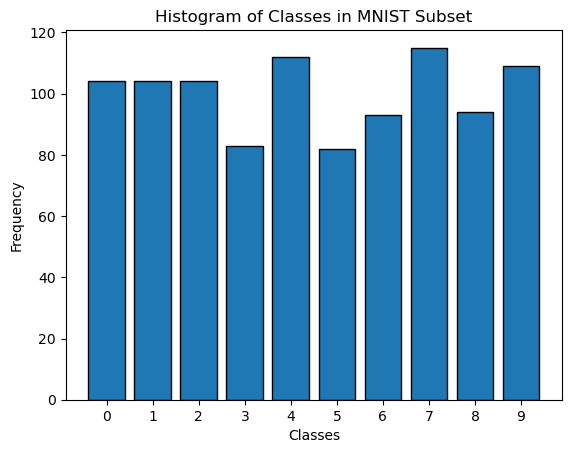

In [4]:
unique_labels, label_counts = np.unique(labels_subset.numpy(), return_counts=True)

plt.hist(labels_subset.numpy(), bins=np.arange(len(unique_labels)+1) - 0.5, edgecolor='black', align='mid', rwidth=0.8)
plt.title('Histogram of Classes in MNIST Subset')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(unique_labels)  
plt.show()

**2.1.3**

In [5]:
batched_imageSet = rearrange(images_subset, '(b1 b2 b3) h w -> b1 b2 b3 h w', b2 = 25, b3 = 1)
print(batched_imageSet.shape)

torch.Size([40, 25, 1, 28, 28])


**2.1.4**

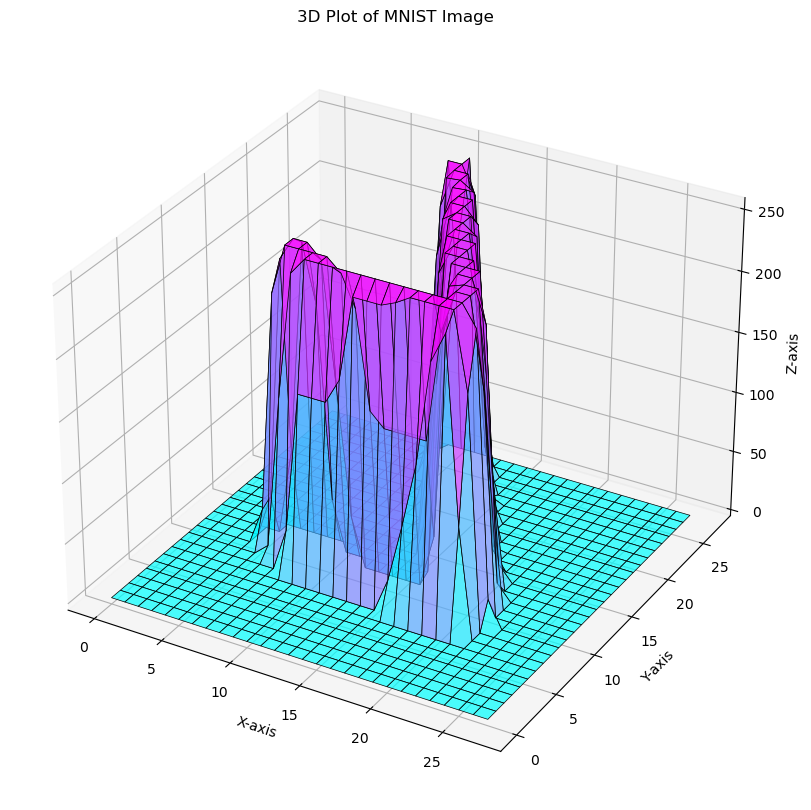

In [8]:
idx = random.choice(range(len(mnist)))
image = mnist.data[idx]

# Plot the image in 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

height, width = image.shape
x = np.arange(0, width, 1)
y = np.arange(0, height, 1)
x, y = np.meshgrid(x, y)
z = image.flatten()

ax.plot_surface(x, y, image, cmap='cool', edgecolor='k', linewidth=0.5, alpha=0.7)

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Plot of MNIST Image')

plt.show()

**__________________________________________________________________________________________________________________________**

**2.2 Time Series**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**2.2.1**

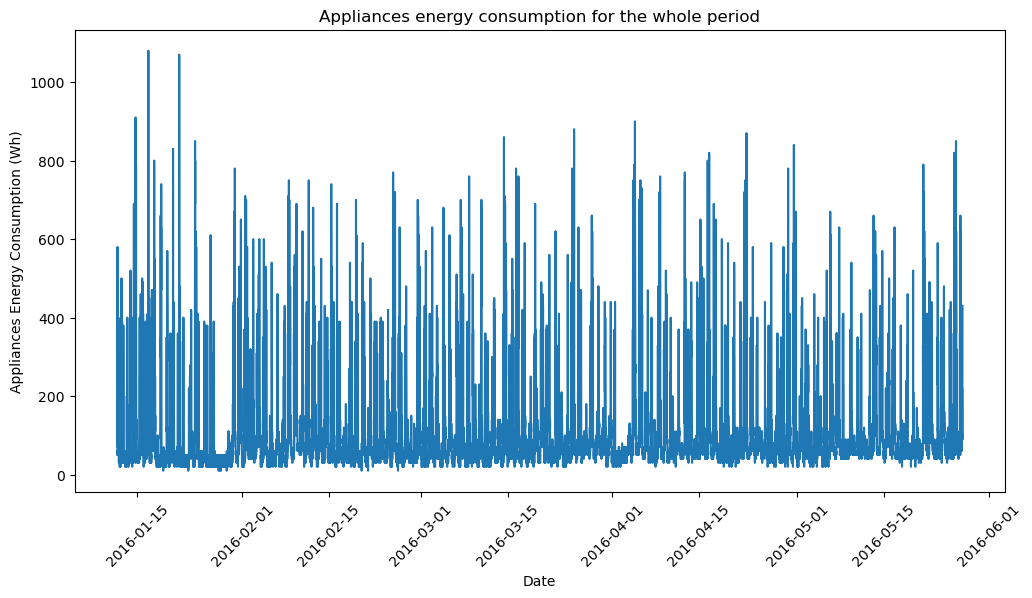

In [11]:
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Appliances'])
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Appliances Energy Consumption (Wh)")
plt.title("Appliances energy consumption for the whole period")

plt.show()

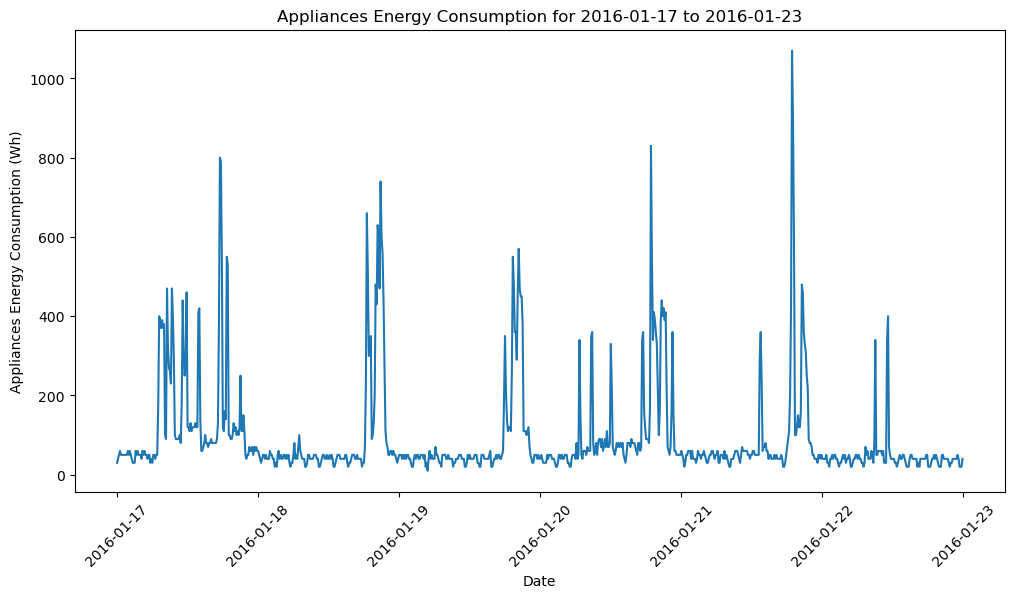

In [12]:
df['date'] = pd.to_datetime(df['date'])
start_date = pd.to_datetime('2016-01-17')
end_date = start_date + pd.Timedelta(days=6)                                   
week = df[(df['date'] >= start_date) & (df['date'] < end_date)]

plt.figure(figsize=(12, 6))
plt.plot(week['date'], week['Appliances'])

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Appliances Energy Consumption (Wh)')
plt.title(f'Appliances Energy Consumption for {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}')

plt.show()

**2.2.2**

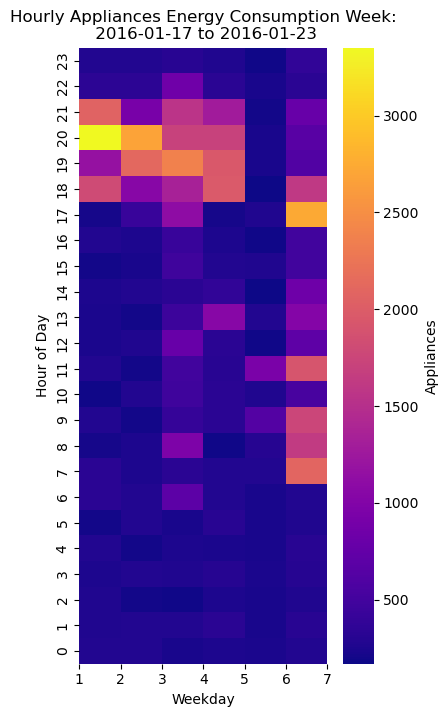

In [13]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.weekday

start_date = pd.to_datetime('2016-01-17')
end_date = start_date + pd.Timedelta(days=6)

week = df[(df['date'] >= start_date) & (df['date'] < end_date)]

heatmap_data = week.pivot_table(index='hour', columns='weekday', values='Appliances', aggfunc='sum')

plt.figure(figsize=(4, 8))
sns.heatmap(heatmap_data, cmap='plasma', annot=False, cbar_kws={'label': 'Appliances'})
plt.title(f'Hourly Appliances Energy Consumption Week:\n {start_date.strftime("%Y-%m-%d")} to {end_date.strftime("%Y-%m-%d")}')
plt.xlabel('Weekday')
plt.xticks(ticks=range(7), labels=range(1, 8))
plt.ylabel('Hour of Day')
plt.gca().invert_yaxis()

plt.show()

**2.2.3**

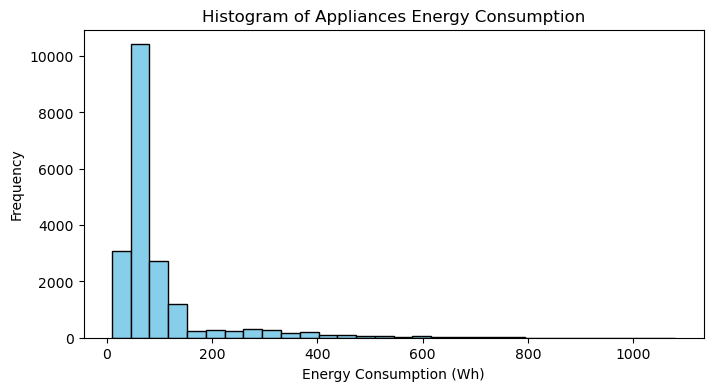

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(df['Appliances'], bins=30, color='skyblue', edgecolor='black')

plt.title('Histogram of Appliances Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')

plt.show()

**2.2.4**

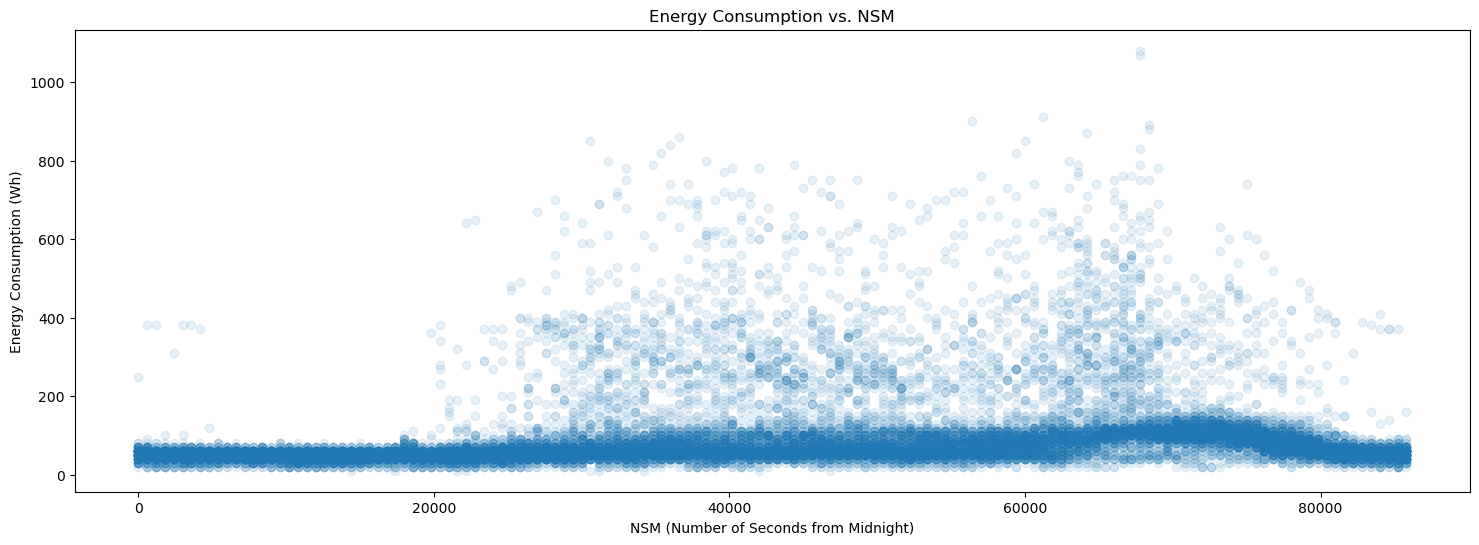

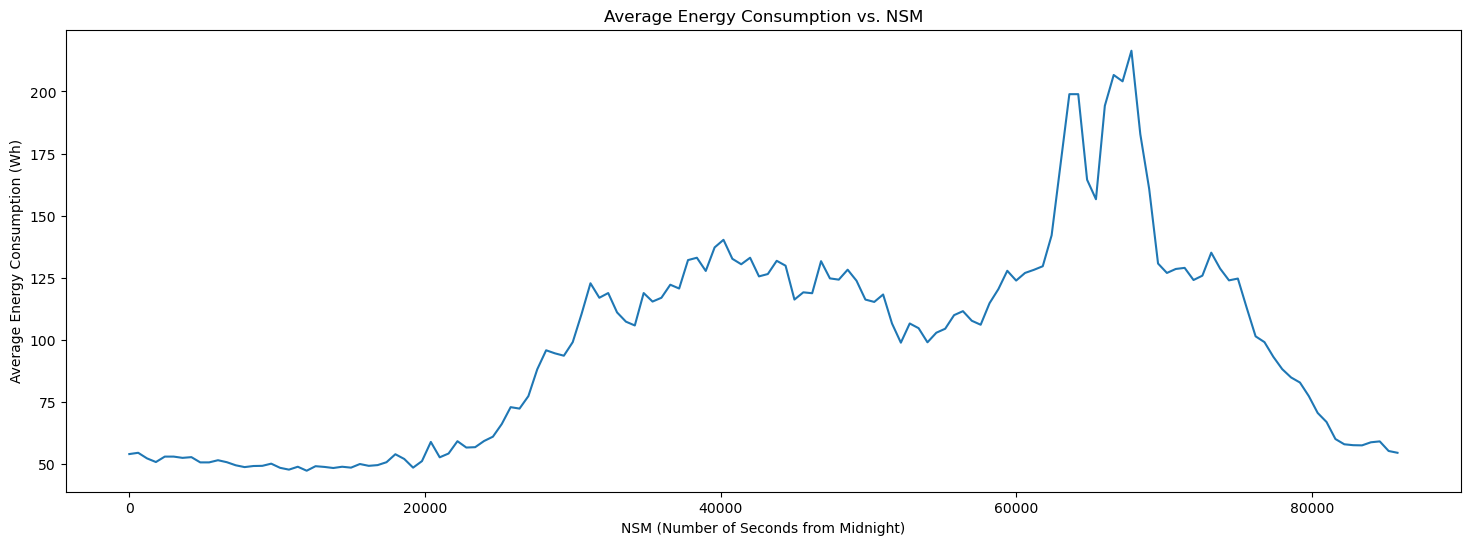

In [15]:
df['NSM'] = (df['date'].dt.hour * 3600) + (df['date'].dt.minute * 60) + (df['date'].dt.second)
average_energy_consumption = df.groupby('NSM')['Appliances'].mean().reset_index()

plt.figure(figsize=(18, 6))
plt.scatter(df['NSM'], df['Appliances'], alpha=0.1)
plt.title('Energy Consumption vs. NSM')
plt.xlabel('NSM (Number of Seconds from Midnight)')
plt.ylabel('Energy Consumption (Wh)')

plt.figure(figsize=(18, 6))
plt.plot(average_energy_consumption['NSM'], average_energy_consumption['Appliances'])
plt.title('Average Energy Consumption vs. NSM')
plt.xlabel('NSM (Number of Seconds from Midnight)')
plt.ylabel('Average Energy Consumption (Wh)')

plt.show()

**2.2.5**

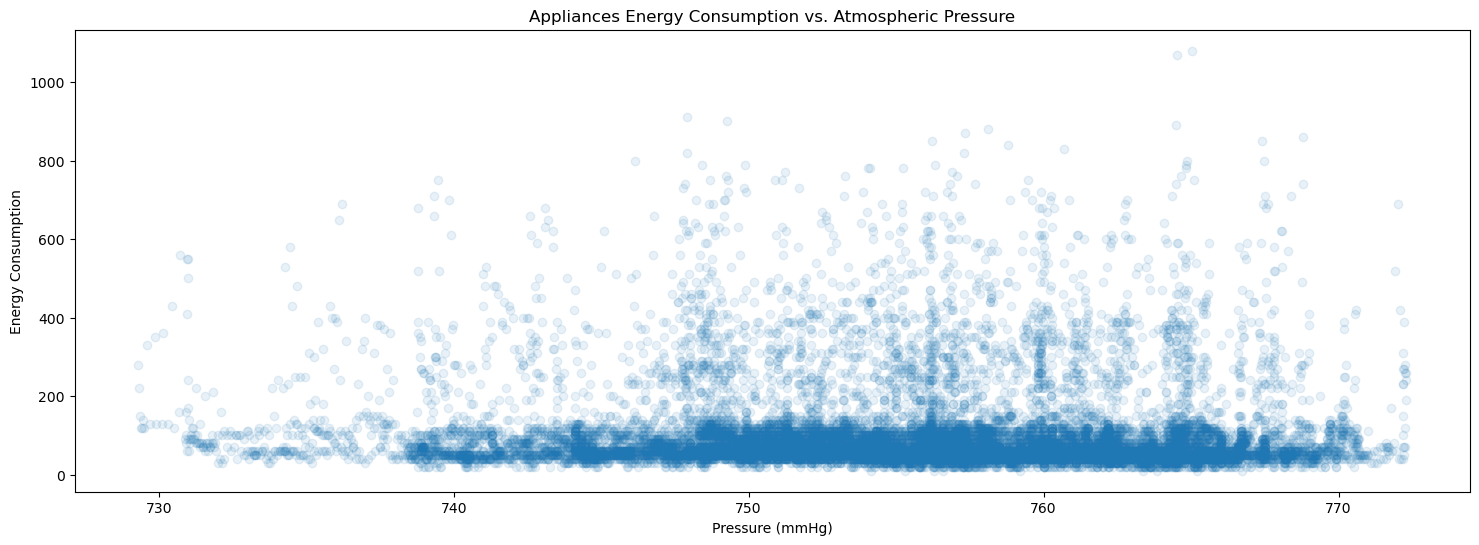

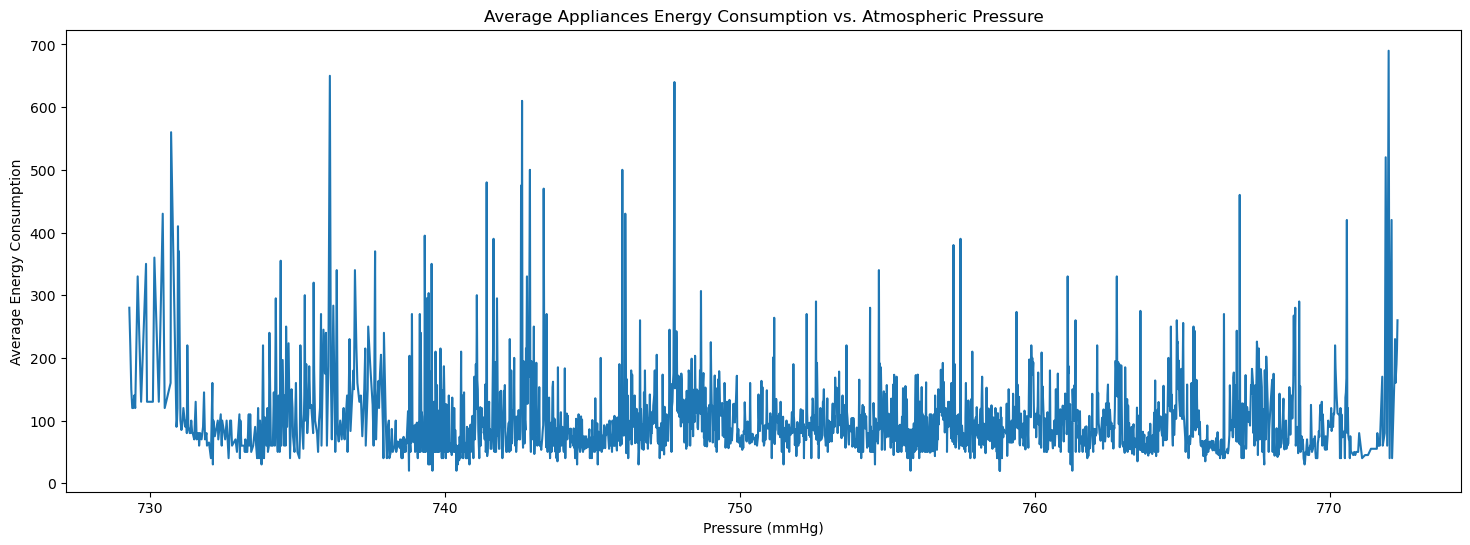

In [16]:
average_energy_pressure = df.groupby('Press_mm_hg')['Appliances'].mean().reset_index()

plt.figure(figsize=(18, 6))
plt.scatter(df['Press_mm_hg'], df['Appliances'], alpha=0.1)
plt.title('Appliances Energy Consumption vs. Atmospheric Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Energy Consumption')

plt.figure(figsize=(18, 6))
plt.plot(average_energy_pressure['Press_mm_hg'], average_energy_pressure['Appliances'])
plt.title('Average Appliances Energy Consumption vs. Atmospheric Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Average Energy Consumption')

plt.show()

**2.2.6**

It is possible to observe that energy consumption is higher from around 7 am (25,000 seconds) until 10 pm (80,000 seconds), which makes sense given that most people are awake during this period of the day. Moreover, there is a clear "peak" of energy consumption at around 6 pm (65,000 seconds), which is when most people are at home after work and using more appliances. In regards to pressure and energy consumption: pressure is a significant contributing factor to energy consumption due to pressure's influence on weather, which could mean an increase in house occupancy -  for instance, it could cause an increase in HVAC system energy use.

**__________________________________________________________________________________________________________________________**

**2.3 Multi-variate**

In [17]:
column_names = ["Frequency (Hz)", "Angle of Attack (deg)", "Chord Length (m)", "Free-stream Velocity (m/s)", "Suction Side Displacement Thickness (m)", "Scaled Sound Pressure Level (dB)"]
df = pd.read_csv("airfoil_self_noise.dat", sep="\t", header=None, names=column_names)
df.head()

,Frequency (Hz),Angle of Attack (deg),Chord Length (m),Free-stream Velocity (m/s),Suction Side Displacement Thickness (m),Scaled Sound Pressure Level (dB)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [18]:
print("\33[1m"+"Mean:"+"\33[0m")
mean = df.mean()
print(mean)

Mean:
Frequency (Hz)                             2886.380572
Angle of Attack (deg)                         6.782302
Chord Length (m)                              0.136548
Free-stream Velocity (m/s)                   50.860745
Suction Side Displacement Thickness (m)       0.011140
Scaled Sound Pressure Level (dB)            124.835943
dtype: float64


In [19]:
print("\33[1m"+"\nVariance:"+"\33[0m")
variance = df.var()
print(variance)


Variance:
Frequency (Hz)                             9.938717e+06
Angle of Attack (deg)                      3.502424e+01
Chord Length (m)                           8.749868e-03
Free-stream Velocity (m/s)                 2.425116e+02
Suction Side Displacement Thickness (m)    1.729287e-04
Scaled Sound Pressure Level (dB)           4.759146e+01
dtype: float64


In [20]:
print("\33[1m"+"\nMedian:"+"\33[0m")
median = df.median()
print(median)


Median:
Frequency (Hz)                             1600.000000
Angle of Attack (deg)                         5.400000
Chord Length (m)                              0.101600
Free-stream Velocity (m/s)                   39.600000
Suction Side Displacement Thickness (m)       0.004957
Scaled Sound Pressure Level (dB)            125.721000
dtype: float64


In [21]:
print("\33[1m"+"\nKurtosis:"+"\33[0m")
kurtosis = df.kurtosis()
print(kurtosis)


Kurtosis:
Frequency (Hz)                             5.708685
Angle of Attack (deg)                     -0.412951
Chord Length (m)                          -1.037964
Free-stream Velocity (m/s)                -1.563951
Suction Side Displacement Thickness (m)    2.218903
Scaled Sound Pressure Level (dB)          -0.314187
dtype: float64


In [22]:
print("\33[1m"+"\nSkweness:"+"\33[0m")
skewness = df.skew()
print(skewness)


Skweness:
Frequency (Hz)                             2.137084
Angle of Attack (deg)                      0.689164
Chord Length (m)                           0.457457
Free-stream Velocity (m/s)                 0.235852
Suction Side Displacement Thickness (m)    1.702165
Scaled Sound Pressure Level (dB)          -0.418952
dtype: float64


In [23]:
print("\33[1m"+"\nRange:"+"\33[0m")
_range = df.max() - df.min()
print(_range)


Range:
Frequency (Hz)                             19800.000000
Angle of Attack (deg)                         22.200000
Chord Length (m)                               0.279400
Free-stream Velocity (m/s)                    39.600000
Suction Side Displacement Thickness (m)        0.058011
Scaled Sound Pressure Level (dB)              37.607000
dtype: float64
